## Análisis de Optimización de Portafolio con Simulación Monte Carlo

###  Componentes Principales

#### Datos y Preparación
- Utiliza acciones reales del S&P 500 y Dow Jones como AAPL, MSFT, JNJ, etc.
- Descarga datos históricos usando `yfinance`
- Calcula retornos diarios para cada activo

#### Simulación Monte Carlo
- Genera 1000 portafolios diferentes con pesos aleatorios
- Para cada portafolio calcula:
  - Retorno esperado
  - Volatilidad
  - Ratio de Sharpe (medida de rendimiento ajustado al riesgo)

#### Optimización
- Encuentra el portafolio óptimo basado en el mayor Ratio de Sharpe
- Calcula la frontera eficiente
- Visualiza los resultados en un gráfico de dispersión

### Uso Práctico

El código permite:
1. Encontrar la combinación óptima de activos
2. Visualizar la relación riesgo-retorno
3. Entender la diversificación del portafolio
4. Tomar decisiones basadas en el perfil de riesgo del inversor

###  Consideraciones

- Los resultados se basan en datos históricos
- La simulación asume normalidad en los retornos
- Los pesos están restringidos a ser positivos (no hay ventas en corto)
- Se recomienda rebalancear periódicamente


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Función para descargar datos históricos
def get_stock_data(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        stock_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
        data[ticker] = stock_data
    return data

# Configuración inicial
stocks = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'V', 'WMT', 'HD', 'UNH', 'BAC']
start_date = '2019-01-01'
end_date = '2025-01-01'

# Obtener datos
stock_data = get_stock_data(stocks, start_date, end_date)

stock_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,JNJ,JPM,PG,V,WMT,HD,UNH,BAC
Date,,,,,,,,,,
2019-01-02,37.750084,95.501343,109.023041,83.344429,78.935959,127.731453,28.355373,149.570618,223.328629,21.671219
2019-01-03,33.989899,91.988022,107.290596,82.159996,78.382530,123.128426,28.209564,146.273972,217.238419,21.323925
2019-01-04,35.440903,96.266312,109.091301,85.188858,79.982338,128.432922,28.385756,150.620285,219.779037,22.209524
2019-01-07,35.362026,96.389091,108.391510,85.248055,79.662369,130.748886,28.719917,153.587234,220.200974,22.192160
2019-01-08,36.036133,97.087975,110.909042,85.087311,79.956375,131.460007,28.920422,154.324615,223.145203,22.148746


In [6]:
# Calcular retornos diarios
returns = stock_data.pct_change() #Retornos simples

returns.head()

,AAPL,MSFT,JNJ,JPM,PG,V,WMT,HD,UNH,BAC
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.036788,-0.015891,-0.014211,-0.007011,-0.036037,-0.005142,-0.022041,-0.027270,-0.016026
2019-01-04,0.042689,0.046509,0.016783,0.036865,0.020410,0.043081,0.006246,0.029714,0.011695,0.041531
2019-01-07,-0.002226,0.001275,-0.006415,0.000695,-0.004000,0.018032,0.011772,0.019698,0.001920,-0.000782
2019-01-08,0.019063,0.007251,0.023226,-0.001886,0.003691,0.005439,0.006981,0.004801,0.013371,-0.001956


In [7]:
#Simulación de montecarlo:

# Parámetros para la simulación Monte Carlo
num_portfolios = 1000
rf_rate = 0.04  # Tasa libre de riesgo (4%)

# Arrays para almacenar resultados
all_weights = np.zeros((num_portfolios, len(stocks)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

# Simulación Monte Carlo
for port in range(num_portfolios):
    # Generar pesos aleatorios
    weights = np.random.random(len(stocks))
    weights = weights/np.sum(weights) # Normalización de pesos
    all_weights[port,:] = weights
    
    # Calcular retorno esperado
    port_ret = np.sum(returns.mean() * weights) * 252
    ret_arr[port] = port_ret
    
    # Calcular volatilidad del portafolio
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    vol_arr[port] = port_vol
    
    # Calcular Ratio de Sharpe
    sharpe_arr[port] = (port_ret - rf_rate) / port_vol

In [8]:
# Encontrar el portafolio óptimo (mayor Sharpe Ratio)
optimal_idx = sharpe_arr.argmax()
optimal_weights = all_weights[optimal_idx,:]
optimal_ret = ret_arr[optimal_idx]
optimal_vol = vol_arr[optimal_idx]
optimal_sharpe = sharpe_arr[optimal_idx]

# Crear DataFrame con resultados
results = pd.DataFrame({
    'Return': ret_arr,
    'Volatility': vol_arr,
    'Sharpe Ratio': sharpe_arr
})

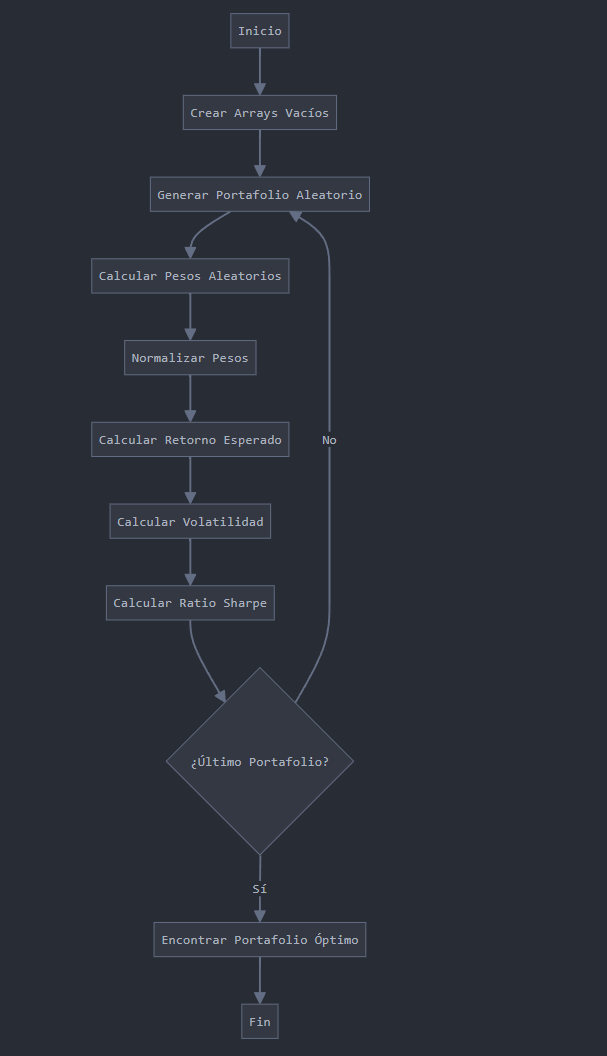

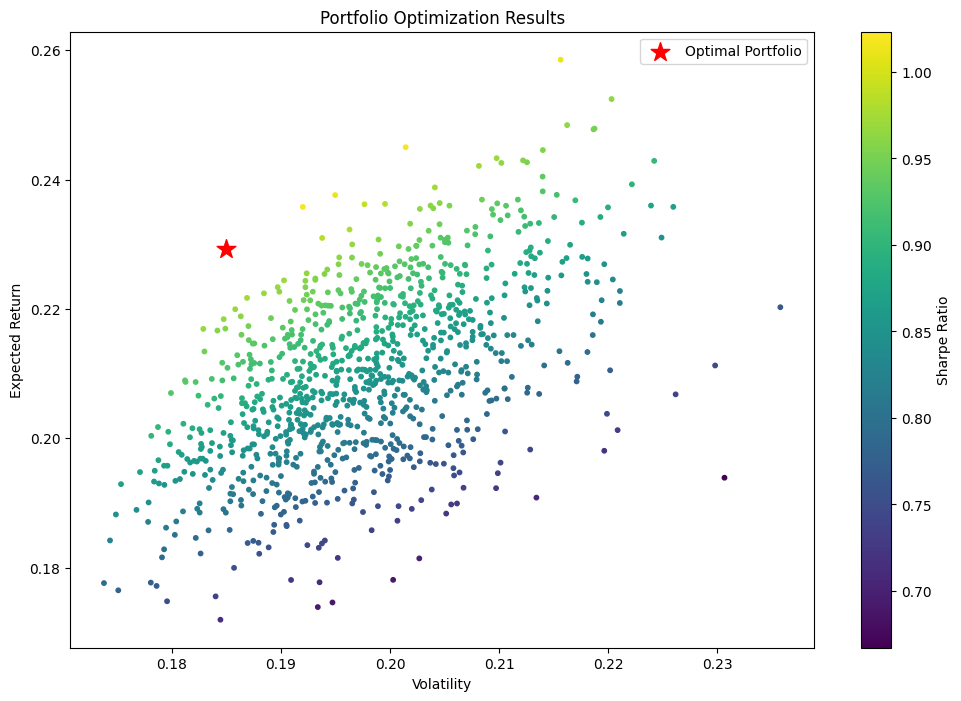


Portafolio Óptimo:
--------------------
Retorno Esperado: 22.92%
Volatilidad: 18.49%
Ratio de Sharpe: 1.02

Pesos óptimos:
AAPL: 26.02%
MSFT: 0.49%
JNJ: 1.02%
JPM: 9.23%
PG: 33.04%
V: 2.01%
WMT: 23.53%
HD: 0.22%
UNH: 3.07%
BAC: 1.37%


In [9]:
# Visualización
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_vol, optimal_ret, color='red', marker='*', s=200, label='Optimal Portfolio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization Results')
plt.legend()
plt.show()

# Imprimir resultados del portafolio óptimo
print("\nPortafolio Óptimo:")
print("--------------------")
print(f"Retorno Esperado: {optimal_ret*100:.2f}%")
print(f"Volatilidad: {optimal_vol*100:.2f}%")
print(f"Ratio de Sharpe: {optimal_sharpe:.2f}")
print("\nPesos óptimos:")
for stock, weight in zip(stocks, optimal_weights):
    print(f"{stock}: {weight*100:.2f}%")